# PHYS 472 Quantum Mechanics 2
### Joseph Hickey 1 May, 2020
### Computational Project Spring 2020
### Numerical Integration of the Schroedinger Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

A numerical integration program which returns a wavefunction for the linear half-potential based on an input particle energy.
Using the following equations, it is simply to construct an explicit integration of the wavefunction in one dimension. This could form the basis of a time evolving system which begins in an eigenstate and is integrated forward in time.


1. $ \psi(x+\Delta x) = \psi(x) +\frac{d\psi}{dx}\big\rvert_x\Delta x + \frac{d^2\psi}{dx^2}\big\rvert_x\frac{{\Delta x}^2}{2}$


2. $\frac{d\psi}{dx} \big\rvert_{x+\Delta x} = \frac{d\psi}{dx} \big\rvert_x + \frac{d^2\psi}{dx^2}\big\rvert_x\Delta x$


3. $\frac{d^2\psi}{dx^2} \big\rvert_x = \frac{2m}{\hbar^2}[V(x) - E]\psi(x)$

Because half-potentials are defined piecewise as:
$$  V(x) =
  \begin{cases}
                         \infty & \text{if $x<0$} \\
                         \alpha x^\gamma & \text{if $x \geq 0 $} 
  \end{cases}
$$

The wavefunction has an initial condition of $\psi(0) = 0$ and the derivative $\frac{d\psi}{dx}\big\rvert_{x=0}$ can be an arbitary non-zero scalar which we will set to 1 for simplicity.

In [2]:
# Function which takes in the value of the wavefunction and its derivative at the previous
# position step and uses them to evaluate the second derivative, derivative, and function at the new position
def Integrator(psi,dpsi,x,dx,E,gam):
    # psi is the value of the wave function at x-dx
    # dpsi is the value of the derivative at x-dx
    # x and dx are the current position and position step respectively
    # E is the trial energy of the system
    # gam is the exponent of the potential well spatial dependence
    
    # First evaluate the current second derivative and then apply the values as proscribed above
    # 0.26426 is the value of the coefficient of the second derivative in units of inverse angstroms squared
    d2psi = 0.26426 * psi * (Potential(x,gam) - E)
    psi += (dx*dpsi + 0.5*(dx**2)*d2psi)
    dpsi += (dx * d2psi)
    
    # returns the current values of both the wavefunction and it's derivative
    return psi,dpsi

In [3]:
# Function which runs the loop for the integration. By integrating from a starting to a final position,
# a complete array holding the values of the wavefunction is generated and returned.
def tracker(xf,dx,E,gam):
    # xf is the final distance in angstroms from zero at which you would like to stop the integration. Most quantum systems work 
    # at very small scales so distances greater than 15 angstroms are rarely needed for the lowest energies
    # dx is the position step which is the main determinant in the fidelity of the integration. Large dx gives low resolution
    # E is the trial energy of the system in units of eV
    # gam is the exponent of the potential well spatial dependence
    
    # n is the number of steps the integration will undergo
    n = int(np.ceil(xf/dx))
    
    # Initializing the arrays which will hold the values of psi and dpsi is faster than appending to an empty list.
    psi = np.zeros(n)
    dpsi = np.zeros(n)
    # Set initial condition on the derivative
    dpsi[0] = 1.
    
    # Begin for loop to loop over the region of interest
    for i in range(n-1):
        # Assign the results of the integrator to the array
        psi[i+1],dpsi[i+1] = Integrator(psi[i],dpsi[i],i*dx,dx,E,gam)
        
    # Define an array with a length equal to that of psi for graphing
    x = np.arange(0,xf,dx)
    
    # returns the arrays of both discretized space and psi
    return x,psi
        
    
    
    

In [4]:
# Function which returns the value of the potential at a given position
def Potential(x,gam):
    # x is the position of interest in angstroms
    # gam is the exponent of the potential well spatial dependence
    
    # Check that the position is not in the infinite potential
    # region fidelity breaks down in the high energy regime though
    # behavior of the wavefunction is much more predicatble at 
    #those energies and this program is not necessary
    if x < 0:
        x = 1000000
    
    # Set the value of the coefficient in units of eV per angstrom^gamma
    alpha = 1
    
    # return the value of the potential
    return alpha*x**gam

Text(0,0.5,'$\\psi(x)$')

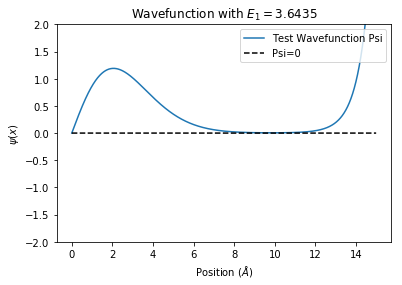

In [5]:
# Assign and plot the values of psi as well as a zero line for comparison
x,p = tracker(15,0.00001,3.6435,1)
plt.plot(x,p,label='Test Wavefunction Psi')
y=np.zeros(len(x))
plt.plot(x,y,'k--',label='Psi=0')

plt.ylim(-2,2)
plt.legend(loc='upper right')
plt.title('Wavefunction with ' r'$E_1 = 3.6435$')
plt.xlabel('Position ' r'($\AA$)')
plt.ylabel(r'$\psi(x)$')

Text(0,0.5,'$\\psi(x)$')

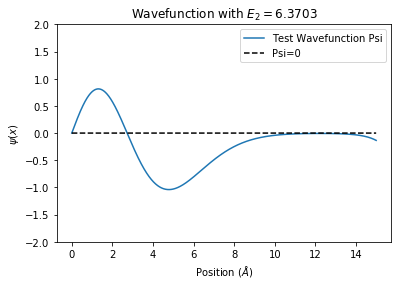

In [6]:
# Assign and plot the values of psi as well as a zero line for comparison
x,p = tracker(15,0.00001,6.3703,1)
plt.plot(x,p,label='Test Wavefunction Psi')
y=np.zeros(len(x))
plt.plot(x,y,'k--',label='Psi=0')
plt.ylim(-2,2)
plt.legend(loc='upper right')
plt.title('Wavefunction with ' r'$E_2 = 6.3703$')
plt.xlabel('Position ' r'($\AA$)')
plt.ylabel(r'$\psi(x)$')

Text(0,0.5,'$\\psi(x)$')

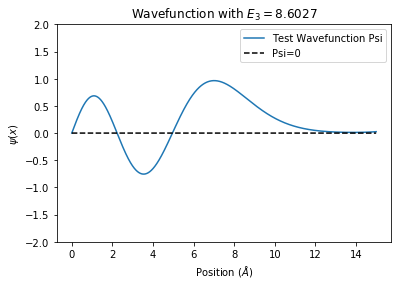

In [7]:
# Assign and plot the values of psi as well as a zero line for comparison
x,p = tracker(15,0.00001,8.6027,1)
plt.plot(x,p,label='Test Wavefunction Psi')
y=np.zeros(len(x))
plt.plot(x,y,'k--',label='Psi=0')
plt.ylim(-2,2)
plt.legend(loc='upper right')
plt.title('Wavefunction with ' r'$E_3 = 8.6027$')
plt.xlabel('Position ' r'($\AA$)')
plt.ylabel(r'$\psi(x)$')

Text(0,0.5,'$\\psi(x)$')

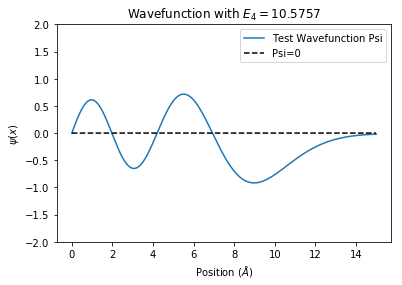

In [8]:
# Assign and plot the values of psi as well as a zero line for comparison
x,p = tracker(15,0.00001,10.5757,1)
plt.plot(x,p,label='Test Wavefunction Psi')
y=np.zeros(len(x))
plt.plot(x,y,'k--',label='Psi=0')
plt.ylim(-2,2)
plt.legend(loc='upper right')
plt.title('Wavefunction with ' r'$E_4 = 10.5757$')
plt.xlabel('Position ' r'($\AA$)')
plt.ylabel(r'$\psi(x)$')